In [35]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os
os.chdir("C:/Users/ACER/anaconda3/data_analys/Lect_04/задача_2_Economics of Cities/")

In [7]:
df = pd.read_csv("data_o.csv", sep=";")
df.head()

,x,y
0,0,0
1,2,4
2,3,3
3,1,2
4,3,0


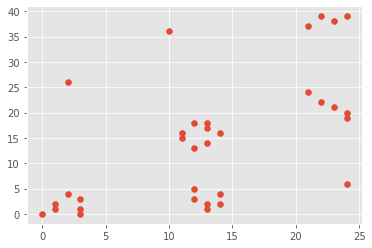

In [8]:
scatter(df['x'],df['y'])
# все кластеры визуально различимы

,x,y,dbscan_1,Kmeans
cluster,,,,
1,1.857143,1.571429,0.0,4
2,13.000000,2.833333,2.0,1
3,24.000000,6.000000,-1.0,6
4,22.800000,21.200000,3.0,0
5,12.375000,15.875000,1.0,2
6,22.500000,38.250000,4.0,3
7,2.000000,26.000000,-1.0,7
8,10.000000,36.000000,-1.0,5


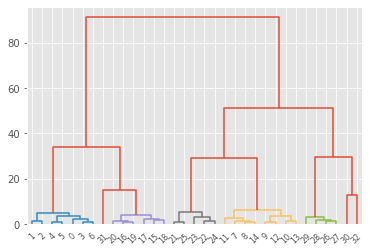

In [67]:
link = linkage(df[['x','y']], 'ward', 'euclidean')
dn = dendrogram(link, color_threshold = 10, labels=df.index.tolist())
df['cluster'] = fcluster(link, 10, criterion='distance')
df.groupby('cluster').mean()

Text(0, 0.5, 'Distance')

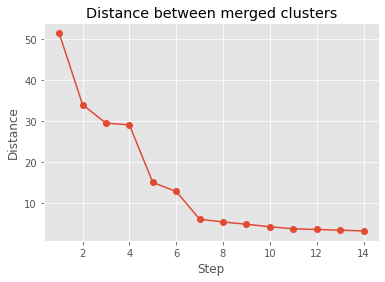

In [68]:
dist = link[-15:-1, 2]
#dist = link[-15:len(link)+1, 2]
# первый вариант лучше, так как последняя точка на отображении искажает масштаб
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Distance between merged clusters')
plt.xlabel('Step')
plt.ylabel('Distance')


In [69]:
df['cluster'].sort_values()
# данный метод определяет те же кластеры, что при визуальном распознавании

0     1
1     1
2     1
3     1
4     1
5     1
6     1
20    2
19    2
18    2
17    2
15    2
16    2
31    3
22    4
25    4
24    4
23    4
21    4
12    5
13    5
8     5
9     5
10    5
11    5
14    5
7     5
26    6
27    6
28    6
29    6
30    7
32    8
Name: cluster, dtype: int32

In [16]:
df2 = pd.read_csv("data_o.csv", sep=";")

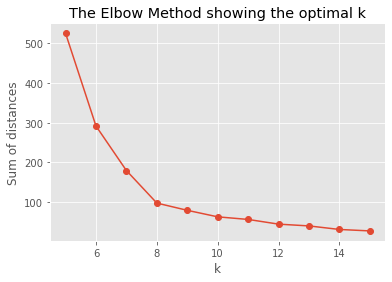

In [70]:
cluster_number_range = range(5, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(df[['x','y']]) for k in cluster_number_range]
dist = [model.inertia_ for model in models]

# Plot the elbow
plt.plot(cluster_number_range, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [71]:
cluster_number_range = range(5, 16)
models = [KMeans(n_clusters=k, random_state=42).fit(df2) for k in cluster_number_range]
dist = [(i+5, models[i].inertia_) for i in range(len(models))]
dist

[(5, 588.8825396825397),
 (6, 323.1714285714286),
 (7, 180.0047619047619),
 (8, 97.5047619047619),
 (9, 79.2547619047619),
 (10, 62.82142857142858),
 (11, 52.00000000000001),
 (12, 44.416666666666664),
 (13, 39.83333333333333),
 (14, 31.0),
 (15, 27.333333333333332)]

In [72]:
model = KMeans(n_clusters=8, random_state=42, max_iter=300, n_init=10, verbose=0 )
model.fit(df2)

#model.labels_
df['Kmeans'] = model.labels_
df[['x','y', 'Kmeans']].groupby('Kmeans').mean()

,x,y
Kmeans,,
0,22.800000,21.200000
1,13.000000,2.833333
2,12.375000,15.875000
3,22.500000,38.250000
4,1.857143,1.571429
5,10.000000,36.000000
6,24.000000,6.000000
7,2.000000,26.000000


In [73]:
df3 = pd.read_csv("data_o.csv", sep=";")

In [79]:

dbscan_1 = DBSCAN(eps=6, metric='euclidean', min_samples=3)

dbscan_1.fit(df[['x','y']])
unique, counts = np.unique(dbscan_1.labels_, return_counts=True)
df['dbscan'] = dbscan_1.labels_
print(np.asarray((unique, counts)).T)
#data_frame['cluster'] = dbscan_1.labels_
#data_frame.groupby('cluster').mean()

[[-1  3]
 [ 0  7]
 [ 1  8]
 [ 2  6]
 [ 3  5]
 [ 4  4]]


In [80]:
df[['x','y', 'dbscan']].groupby('dbscan').mean()

,x,y
dbscan,,
-1,12.000000,22.666667
0,1.857143,1.571429
1,12.375000,15.875000
2,13.000000,2.833333
3,22.800000,21.200000
4,22.500000,38.250000


In [76]:
df[['x','y', 'Kmeans']].groupby('Kmeans').mean()


,x,y
Kmeans,,
0,22.800000,21.200000
1,13.000000,2.833333
2,12.375000,15.875000
3,22.500000,38.250000
4,1.857143,1.571429
5,10.000000,36.000000
6,24.000000,6.000000
7,2.000000,26.000000


In [77]:
df[['x','y', 'cluster']].groupby('cluster').mean()

,x,y
cluster,,
1,1.857143,1.571429
2,13.000000,2.833333
3,24.000000,6.000000
4,22.800000,21.200000
5,12.375000,15.875000
6,22.500000,38.250000
7,2.000000,26.000000
8,10.000000,36.000000


In [81]:
tab1 = pd.crosstab(df['dbscan'], df['cluster'])
tab2 = pd.crosstab(df['dbscan'], df['Kmeans'])
tab3 = pd.crosstab(df['cluster'], df['Kmeans'])

print(tab1)
print('###############################')
print(tab2)
print('###############################')
print(tab3)

cluster  1  2  3  4  5  6  7  8
dbscan                         
-1       0  0  1  0  0  0  1  1
 0       7  0  0  0  0  0  0  0
 1       0  0  0  0  8  0  0  0
 2       0  6  0  0  0  0  0  0
 3       0  0  0  5  0  0  0  0
 4       0  0  0  0  0  4  0  0
###############################
Kmeans  0  1  2  3  4  5  6  7
dbscan                        
-1      0  0  0  0  0  1  1  1
 0      0  0  0  0  7  0  0  0
 1      0  0  8  0  0  0  0  0
 2      0  6  0  0  0  0  0  0
 3      5  0  0  0  0  0  0  0
 4      0  0  0  4  0  0  0  0
###############################
Kmeans   0  1  2  3  4  5  6  7
cluster                        
1        0  0  0  0  7  0  0  0
2        0  6  0  0  0  0  0  0
3        0  0  0  0  0  0  1  0
4        5  0  0  0  0  0  0  0
5        0  0  8  0  0  0  0  0
6        0  0  0  4  0  0  0  0
7        0  0  0  0  0  0  0  1
8        0  0  0  0  0  1  0  0


In [ ]:
# как видно из таблицы все 3 метода определяют одни и те же кластеры